## Victor Gómez
### victor.gomez@cimat.mx


# Maestría en Cómputo Estadístico
# CIMAT Monterrey

# <center>Tópicos selectos de ciencia de datos<center>
# <center>Proyecto final<center>
## <center>SVM con TFIDF para análisis de sentimientos en textos en español<center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
CurrentPath='/content/drive/MyDrive/Colab Notebooks/ProyectoCiencia/Sentiment/Spanish'

In [4]:
# Librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
import seaborn as sns
import plotly.express as px
from sklearn.metrics import classification_report, accuracy_score,  confusion_matrix
from sklearn.model_selection import  RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC

import joblib

In [5]:
!pip install microtc

  Created wheel for microtc: filename=microtc-2.2.5-cp36-none-any.whl size=56493 sha256=3ef4e556eb7553cb6e9ce25c67611e6c9fd92daa96f68939636184a1e4f2b6fd
  Stored in directory: /root/.cache/pip/wheels/a1/aa/9f/ae7ca326cfcbd08baf81bafcc774aaacf3d8710545fa2aabec
Successfully built microtc


In [6]:
from microtc.textmodel import TextModel

## Importar textos

In [7]:
df=pd.read_csv(CurrentPath+'/train.csv',index_col=0)
df.head()

,tweets,polarity
0,@FridaCoral ven a chetu mejor,NEU
1,quiero y necesito verte yaaaa,P
2,Danniel es como mi amor frustrado,N
3,Solo a los fav responde celosa mil @belindapop...,N
4,@belindapop #AskBeli ¿Porque siempre respondes...,NEU


In [8]:
TEXTS=df.tweets.values
labels=df.polarity.values

In [9]:
TEXTS_train, TEXTS_test, labels_train, labels_test = train_test_split(TEXTS, labels, test_size = .2, stratify=labels, random_state=42)

## Pre-procesar textos

## TFIDF with micro tc

https://microtc.readthedocs.io/en/latest/

In [10]:
# Create CountVectorizer object #CountVectorizer, TfidfVectorizer
textmodel = TextModel().fit(TEXTS_train)

In [11]:
D_train=textmodel.transform(TEXTS_train) #matriz de terminos
D_test=textmodel.transform(TEXTS_test)

In [12]:
D_train.shape

(3103, 9043)

## Train Models

In [ ]:
#SVM
def SVM_model():
    parameters = [{'C': [0.1, 10], 'kernel': ['linear']},{'C': [ 1,5, 10,20], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}]
        
    return SVC(max_iter=-1), parameters

classifier,params=SVM_model()
model = RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',cv=3,n_jobs=-1)
model.fit(D_train, labels_train)

# Print the tuned parameters and score
print("Tuned SVM Parameters: {}".format(model.best_params_)) 
print("Best score is {}".format(model.best_score_))

Tuned SVM Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
Best score is 0.6052218141949871


In [ ]:
#SVM
def SVM_model():
    parameters = [{'C': [ 5], 'gamma': [ 0.1], 'kernel': ['rbf']}]
        
    return SVC(max_iter=-1), parameters

classifier,params=SVM_model()
model = GridSearchCV(classifier,param_grid=params,scoring='accuracy',cv=3,n_jobs=-1)
model.fit(D_train, labels_train)

# Print the tuned parameters and score
print("Tuned SVM Parameters: {}".format(model.best_params_)) 
print("Best score is {}".format(model.best_score_))

Tuned SVM Parameters: {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Best score is 0.6139230728499924


In [14]:
#SVM tiempo: 2.42s

model = SVC(max_iter=-1,C=5,gamma=0.1, kernel='rbf')
model.fit(D_train, labels_train)


SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
filename = 'SVM_model.sav'
joblib.dump(model, filename)

['SVM_model.sav']

In [ ]:
y_train_pred=model.predict(D_train)
score=accuracy_score(labels_train, y_train_pred)
print('train',score)

train 0.9535932968095392


In [ ]:
y_test_pred=model.predict(D_test)
score=accuracy_score(labels_test, y_test_pred)
print('test',score)

test 0.6404639175257731


In [ ]:
print(classification_report(labels_test, y_test_pred))

              precision    recall  f1-score   support

           N       0.62      0.74      0.68       258
         NEU       0.61      0.54      0.57       259
           P       0.69      0.64      0.67       259

    accuracy                           0.64       776
   macro avg       0.64      0.64      0.64       776
weighted avg       0.64      0.64      0.64       776



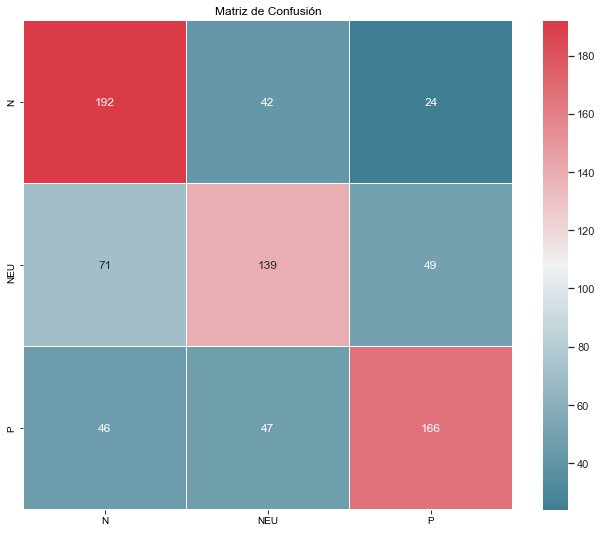

In [ ]:
# matriz de confusion
C = confusion_matrix(labels_test, y_test_pred)
df_c=pd.DataFrame(C)
df_c.columns=np.unique(labels_test).tolist()
df_c.index=np.unique(labels_test).tolist()
f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(df_c, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()